In [1]:
from IPython.display import display

# 言語Data の加工・可視化
アンケートや Review の Comment, 報告書や要望書、特許や論文、SNS の Comment など、様々な Text を分析し、機械学習に利用する Case にて、最初に行なうべき基本的な処理の流れを行なう。

## Text file を読み込もう
項目が定義されている File ではないため、まずは File を open して内容を一気に読み込む。

In [2]:
# File 読み込み
with open('data/chapter4/hashire_merosu.txt', mode='r', encoding='shift-jis') as f:  # 読み込み用の Mode で Open
    content = f.read()  # 全量を一気に読み込み
print(content)  # 内容を表示

走れメロス
太宰治

-------------------------------------------------------
【テキスト中に現れる記号について】

《》：ルビ
（例）邪智暴虐《じゃちぼうぎゃく》

｜：ルビの付く文字列の始まりを特定する記号
（例）疲労｜困憊《こんぱい》

［＃］：入力者注　主に外字の説明や、傍点の位置の指定
（例）［＃地から１字上げ］
-------------------------------------------------------

　メロスは激怒した。必ず、かの邪智暴虐《じゃちぼうぎゃく》の王を除かなければならぬと決意した。メロスには政治がわからぬ。メロスは、村の牧人である。笛を吹き、羊と遊んで暮して来た。けれども邪悪に対しては、人一倍に敏感であった。きょう未明メロスは村を出発し、野を越え山越え、十里はなれた此《こ》のシラクスの市にやって来た。メロスには父も、母も無い。女房も無い。十六の、内気な妹と二人暮しだ。この妹は、村の或る律気な一牧人を、近々、花婿《はなむこ》として迎える事になっていた。結婚式も間近かなのである。メロスは、それゆえ、花嫁の衣裳やら祝宴の御馳走やらを買いに、はるばる市にやって来たのだ。先ず、その品々を買い集め、それから都の大路をぶらぶら歩いた。メロスには竹馬の友があった。セリヌンティウスである。今は此のシラクスの市で、石工をしている。その友を、これから訪ねてみるつもりなのだ。久しく逢わなかったのだから、訪ねて行くのが楽しみである。歩いているうちにメロスは、まちの様子を怪しく思った。ひっそりしている。もう既に日も落ちて、まちの暗いのは当りまえだが、けれども、なんだか、夜のせいばかりでは無く、市全体が、やけに寂しい。のんきなメロスも、だんだん不安になって来た。路で逢った若い衆をつかまえて、何かあったのか、二年まえに此の市に来たときは、夜でも皆が歌をうたって、まちは賑やかであった筈《はず》だが、と質問した。若い衆は、首を振って答えなかった。しばらく歩いて老爺《ろうや》に逢い、こんどはもっと、語勢を強くして質問した。老爺は答えなかった。メロスは両手で老爺のからだをゆすぶって質問を重ねた。老爺は、あたりをはばかる低声で、わずか答えた。
「王様は、人を殺します。」
「なぜ殺すのだ。」
「悪心を抱いてい

- 前半: Title と作者、注意書き
- 本文
- 後半：編集に関する記載

とある程度、Rule がある様子。

## 本文を抽出して１つに纏めよう
取得した Data を行単位で分割した上で１つに繋げる

In [3]:
content = ' '.join(content.split())  # .split() で分割
content

'走れメロス 太宰治 ------------------------------------------------------- 【テキスト中に現れる記号について】 《》：ルビ （例）邪智暴虐《じゃちぼうぎゃく》 ｜：ルビの付く文字列の始まりを特定する記号 （例）疲労｜困憊《こんぱい》 ［＃］：入力者注 主に外字の説明や、傍点の位置の指定 （例）［＃地から１字上げ］ ------------------------------------------------------- メロスは激怒した。必ず、かの邪智暴虐《じゃちぼうぎゃく》の王を除かなければならぬと決意した。メロスには政治がわからぬ。メロスは、村の牧人である。笛を吹き、羊と遊んで暮して来た。けれども邪悪に対しては、人一倍に敏感であった。きょう未明メロスは村を出発し、野を越え山越え、十里はなれた此《こ》のシラクスの市にやって来た。メロスには父も、母も無い。女房も無い。十六の、内気な妹と二人暮しだ。この妹は、村の或る律気な一牧人を、近々、花婿《はなむこ》として迎える事になっていた。結婚式も間近かなのである。メロスは、それゆえ、花嫁の衣裳やら祝宴の御馳走やらを買いに、はるばる市にやって来たのだ。先ず、その品々を買い集め、それから都の大路をぶらぶら歩いた。メロスには竹馬の友があった。セリヌンティウスである。今は此のシラクスの市で、石工をしている。その友を、これから訪ねてみるつもりなのだ。久しく逢わなかったのだから、訪ねて行くのが楽しみである。歩いているうちにメロスは、まちの様子を怪しく思った。ひっそりしている。もう既に日も落ちて、まちの暗いのは当りまえだが、けれども、なんだか、夜のせいばかりでは無く、市全体が、やけに寂しい。のんきなメロスも、だんだん不安になって来た。路で逢った若い衆をつかまえて、何かあったのか、二年まえに此の市に来たときは、夜でも皆が歌をうたって、まちは賑やかであった筈《はず》だが、と質問した。若い衆は、首を振って答えなかった。しばらく歩いて老爺《ろうや》に逢い、こんどはもっと、語勢を強くして質問した。老爺は答えなかった。メロスは両手で老爺のからだをゆすぶって質問を重ねた。老爺は、あたりをはばかる低声で、わずか答えた。 「王様は、人を殺します。」 「なぜ殺すのだ。」 「悪心を抱いている、という

改行がなくなり、１つの Text として繋がっている。
文字の正規化を行なっていく。
> **正規化:**
> 文字のある Rule に基づいて unicode の変換を行なうための処理。

In [4]:
import unicodedata

content = unicodedata.normalize('NFKC', content)  # 'NFKC'形式で正規化
content  # 内容を表示

'走れメロス 太宰治 ------------------------------------------------------- 【テキスト中に現れる記号について】 《》:ルビ (例)邪智暴虐《じゃちぼうぎゃく》 |:ルビの付く文字列の始まりを特定する記号 (例)疲労|困憊《こんぱい》 [#]:入力者注 主に外字の説明や、傍点の位置の指定 (例)[#地から1字上げ] ------------------------------------------------------- メロスは激怒した。必ず、かの邪智暴虐《じゃちぼうぎゃく》の王を除かなければならぬと決意した。メロスには政治がわからぬ。メロスは、村の牧人である。笛を吹き、羊と遊んで暮して来た。けれども邪悪に対しては、人一倍に敏感であった。きょう未明メロスは村を出発し、野を越え山越え、十里はなれた此《こ》のシラクスの市にやって来た。メロスには父も、母も無い。女房も無い。十六の、内気な妹と二人暮しだ。この妹は、村の或る律気な一牧人を、近々、花婿《はなむこ》として迎える事になっていた。結婚式も間近かなのである。メロスは、それゆえ、花嫁の衣裳やら祝宴の御馳走やらを買いに、はるばる市にやって来たのだ。先ず、その品々を買い集め、それから都の大路をぶらぶら歩いた。メロスには竹馬の友があった。セリヌンティウスである。今は此のシラクスの市で、石工をしている。その友を、これから訪ねてみるつもりなのだ。久しく逢わなかったのだから、訪ねて行くのが楽しみである。歩いているうちにメロスは、まちの様子を怪しく思った。ひっそりしている。もう既に日も落ちて、まちの暗いのは当りまえだが、けれども、なんだか、夜のせいばかりでは無く、市全体が、やけに寂しい。のんきなメロスも、だんだん不安になって来た。路で逢った若い衆をつかまえて、何かあったのか、二年まえに此の市に来たときは、夜でも皆が歌をうたって、まちは賑やかであった筈《はず》だが、と質問した。若い衆は、首を振って答えなかった。しばらく歩いて老爺《ろうや》に逢い、こんどはもっと、語勢を強くして質問した。老爺は答えなかった。メロスは両手で老爺のからだをゆすぶって質問を重ねた。老爺は、あたりをはばかる低声で、わずか答えた。 「王様は、人を殺します。」 「なぜ殺すのだ。」 「悪心を抱いている、という

見た目にはわかりづらいが、
- 数値: 半角
- カナ: 全角

で統一された。

Text file に全半角が混在していると同じ単語でも、全角と半角が異なる別の単語と認識されてしまう為、文字の正規化を行なった。

In [5]:
import re

pattern = re.compile(r'^.+(#地から1字上げ].+#地から1字上げ]).+$')  # Pattern を作成。
body = re.match(pattern, content).group(1)  # Pattern に該当する部分だけを取得。
print(body)  # 該当部分の表示

#地から1字上げ] ------------------------------------------------------- メロスは激怒した。必ず、かの邪智暴虐《じゃちぼうぎゃく》の王を除かなければならぬと決意した。メロスには政治がわからぬ。メロスは、村の牧人である。笛を吹き、羊と遊んで暮して来た。けれども邪悪に対しては、人一倍に敏感であった。きょう未明メロスは村を出発し、野を越え山越え、十里はなれた此《こ》のシラクスの市にやって来た。メロスには父も、母も無い。女房も無い。十六の、内気な妹と二人暮しだ。この妹は、村の或る律気な一牧人を、近々、花婿《はなむこ》として迎える事になっていた。結婚式も間近かなのである。メロスは、それゆえ、花嫁の衣裳やら祝宴の御馳走やらを買いに、はるばる市にやって来たのだ。先ず、その品々を買い集め、それから都の大路をぶらぶら歩いた。メロスには竹馬の友があった。セリヌンティウスである。今は此のシラクスの市で、石工をしている。その友を、これから訪ねてみるつもりなのだ。久しく逢わなかったのだから、訪ねて行くのが楽しみである。歩いているうちにメロスは、まちの様子を怪しく思った。ひっそりしている。もう既に日も落ちて、まちの暗いのは当りまえだが、けれども、なんだか、夜のせいばかりでは無く、市全体が、やけに寂しい。のんきなメロスも、だんだん不安になって来た。路で逢った若い衆をつかまえて、何かあったのか、二年まえに此の市に来たときは、夜でも皆が歌をうたって、まちは賑やかであった筈《はず》だが、と質問した。若い衆は、首を振って答えなかった。しばらく歩いて老爺《ろうや》に逢い、こんどはもっと、語勢を強くして質問した。老爺は答えなかった。メロスは両手で老爺のからだをゆすぶって質問を重ねた。老爺は、あたりをはばかる低声で、わずか答えた。 「王様は、人を殺します。」 「なぜ殺すのだ。」 「悪心を抱いている、というのですが、誰もそんな、悪心を持っては居りませぬ。」 「たくさんの人を殺したのか。」 「はい、はじめは王様の妹婿さまを。それから、御自身のお世嗣《よつぎ》を。それから、妹さまを。それから、妹さまの御子さまを。それから、皇后さまを。それから、賢臣のアレキス様を。」 「おどろいた。国王は乱心か。」 「いいえ、乱心ではございませぬ。人を、信ずる事が出来ぬ、とい

In [6]:
body = body.replace('#地から1字上げ] -------------------------------------------------------', '')  # .replace を利用して不要な文字列を削除
body = body.replace('[#地から1字上げ]', '')  # .replace を利用して不要な文字列を削除
body  # Text を表示

' メロスは激怒した。必ず、かの邪智暴虐《じゃちぼうぎゃく》の王を除かなければならぬと決意した。メロスには政治がわからぬ。メロスは、村の牧人である。笛を吹き、羊と遊んで暮して来た。けれども邪悪に対しては、人一倍に敏感であった。きょう未明メロスは村を出発し、野を越え山越え、十里はなれた此《こ》のシラクスの市にやって来た。メロスには父も、母も無い。女房も無い。十六の、内気な妹と二人暮しだ。この妹は、村の或る律気な一牧人を、近々、花婿《はなむこ》として迎える事になっていた。結婚式も間近かなのである。メロスは、それゆえ、花嫁の衣裳やら祝宴の御馳走やらを買いに、はるばる市にやって来たのだ。先ず、その品々を買い集め、それから都の大路をぶらぶら歩いた。メロスには竹馬の友があった。セリヌンティウスである。今は此のシラクスの市で、石工をしている。その友を、これから訪ねてみるつもりなのだ。久しく逢わなかったのだから、訪ねて行くのが楽しみである。歩いているうちにメロスは、まちの様子を怪しく思った。ひっそりしている。もう既に日も落ちて、まちの暗いのは当りまえだが、けれども、なんだか、夜のせいばかりでは無く、市全体が、やけに寂しい。のんきなメロスも、だんだん不安になって来た。路で逢った若い衆をつかまえて、何かあったのか、二年まえに此の市に来たときは、夜でも皆が歌をうたって、まちは賑やかであった筈《はず》だが、と質問した。若い衆は、首を振って答えなかった。しばらく歩いて老爺《ろうや》に逢い、こんどはもっと、語勢を強くして質問した。老爺は答えなかった。メロスは両手で老爺のからだをゆすぶって質問を重ねた。老爺は、あたりをはばかる低声で、わずか答えた。 「王様は、人を殺します。」 「なぜ殺すのだ。」 「悪心を抱いている、というのですが、誰もそんな、悪心を持っては居りませぬ。」 「たくさんの人を殺したのか。」 「はい、はじめは王様の妹婿さまを。それから、御自身のお世嗣《よつぎ》を。それから、妹さまを。それから、妹さまの御子さまを。それから、皇后さまを。それから、賢臣のアレキス様を。」 「おどろいた。国王は乱心か。」 「いいえ、乱心ではございませぬ。人を、信ずる事が出来ぬ、というのです。このごろは、臣下の心をも、お疑いになり、少しく派手な暮しをしている者には、人質ひとりずつ差し出すことを命じて居ります。

本文の先頭と末尾から不要な Text を置換により除外。本文の Text だけを綺麗に抽出することができた。

## 本文項目以外の項目を取り出そう
本文以外の
- Title
- 著者
- 公開日
- 修正日

を項目を取得して、本文と一緒に DataFrame に格納しておく。

In [7]:
with open('data/chapter4/hashire_merosu.txt', mode='r', encoding='shift-jis') as f:
    title = f.readline()  # １行目を読み込み
    author = f.readline()  # ２行目を読み込み
print(title)  # １行目を表示
print(author)  # ２行目を表示

走れメロス

太宰治



改行が含まれていたため、改行Code を置換して削除する。

In [8]:
title = title.replace('\n', '')
print(title)
author = author.replace('\n', '')
print(author)

走れメロス
太宰治


改行が削除されたことを確認。

- 公開日
- 修正日

を取り出す。
本文よりも後に記載されているため、抽出するため本文を行単位で一括読み込みを行なう。

In [9]:
with open('data/chapter4/hashire_merosu.txt', mode='r', encoding='shift-jis') as f:
    content = f.readlines()  # .readlines() で Text全体を行単位で保持
content  # 表示

['走れメロス\n',
 '太宰治\n',
 '\n',
 '-------------------------------------------------------\n',
 '【テキスト中に現れる記号について】\n',
 '\n',
 '《》：ルビ\n',
 '（例）邪智暴虐《じゃちぼうぎゃく》\n',
 '\n',
 '｜：ルビの付く文字列の始まりを特定する記号\n',
 '（例）疲労｜困憊《こんぱい》\n',
 '\n',
 '［＃］：入力者注\u3000主に外字の説明や、傍点の位置の指定\n',
 '（例）［＃地から１字上げ］\n',
 '-------------------------------------------------------\n',
 '\n',
 '\u3000メロスは激怒した。必ず、かの邪智暴虐《じゃちぼうぎゃく》の王を除かなければならぬと決意した。メロスには政治がわからぬ。メロスは、村の牧人である。笛を吹き、羊と遊んで暮して来た。けれども邪悪に対しては、人一倍に敏感であった。きょう未明メロスは村を出発し、野を越え山越え、十里はなれた此《こ》のシラクスの市にやって来た。メロスには父も、母も無い。女房も無い。十六の、内気な妹と二人暮しだ。この妹は、村の或る律気な一牧人を、近々、花婿《はなむこ》として迎える事になっていた。結婚式も間近かなのである。メロスは、それゆえ、花嫁の衣裳やら祝宴の御馳走やらを買いに、はるばる市にやって来たのだ。先ず、その品々を買い集め、それから都の大路をぶらぶら歩いた。メロスには竹馬の友があった。セリヌンティウスである。今は此のシラクスの市で、石工をしている。その友を、これから訪ねてみるつもりなのだ。久しく逢わなかったのだから、訪ねて行くのが楽しみである。歩いているうちにメロスは、まちの様子を怪しく思った。ひっそりしている。もう既に日も落ちて、まちの暗いのは当りまえだが、けれども、なんだか、夜のせいばかりでは無く、市全体が、やけに寂しい。のんきなメロスも、だんだん不安になって来た。路で逢った若い衆をつかまえて、何かあったのか、二年まえに此の市に来たときは、夜でも皆が歌をうたって、まちは賑やかであった筈《はず》だが、と質問した。若い衆は、首を振って答えなかった。しばらく歩いて老爺《ろうや》に逢い、こんどは

行単位の List を DataFrame に格納する

In [10]:
import pandas as pd

df = pd.DataFrame(content, columns=['text'])
df['text'] = df['text'].str.replace('\n', '')  # text とう項目名を設定して改行を一括置換で削除し格納
df

,text
0,走れメロス
1,太宰治
2,
3,----------------------------------------------...
4,【テキスト中に現れる記号について】
...,...
100,校正：高橋美奈子
101,2000年12月4日公開
102,2011年1月17日修正
103,青空文庫作成ファイル：


- 101行目が公開日
- 102行目が修正日

であることを確認。これらを取得し、日付型に変換する

In [11]:
date = df[(df['text'].str.contains('日公開')) | (df['text'].str.contains('日修正'))].copy()  # 日公開と日修正を含む行を取得
print(date)  # 出力

date['text'] = date['text'].str.replace('公開', '')  # 公開を置換して削除
date['text'] = date['text'].str.replace('修正', '')  # 修正を置換して削除
print(date)  # 出力

date['text'] = date['text'].str.replace('年', '/')  # 年を / に置換
date['text'] = date['text'].str.replace('月', '/')  # 月を / に置換
date['text'] = date['text'].str.replace('日', '/')  # 日を / に置換
print(date)  # 出力

date['text'] = pd.to_datetime(date['text'])  # datetime型に変換
print(date)  # 出力
date.dtypes  # Data型を出力

             text
101  2000年12月4日公開
102  2011年1月17日修正
           text
101  2000年12月4日
102  2011年1月17日
           text
101  2000/12/4/
102  2011/1/17/
          text
101 2000-12-04
102 2011-01-17


text    datetime64[ns]
dtype: object

- 行数指定でも対応可能だが、この File にしか対応できなくなる為、汎用的に使うことを意識して加工。
- 日付が文字列のままだと使いずらいため、datetime型へ変換しておくことで Data が溜まってきたときに扱いやすさが各段に良くなる。

In [12]:
release_date = date.iat[0, 0]  # .iat[] で行列を指定し値を抽出。
update_date = date.iat[1, 0]  # .iat[] で行列を指定し値を抽出。
print(release_date)
print(update_date)
date = update_date - release_date  # 修正日から公開日を引いた経過日数を算出
print(date)

2000-12-04 00:00:00
2011-01-17 00:00:00
3696 days 00:00:00


取得した項目を DataFrame に設定する

In [13]:
booklist = pd.DataFrame([[title, author, release_date, update_date, body]],
                        columns=['title', 'author', 'release_date', 'update_date',
                                 'body'])  # 個々に取得した値を List で指定し、columns= で項目名も設定
booklist

,title,author,release_date,update_date,body
0,走れメロス,太宰治,2000-12-04,2011-01-17,メロスは激怒した。必ず、かの邪智暴虐《じゃちぼうぎゃく》の王を除かなければならぬと決意した...


## 形態素解析で単語に分割しよう

In [14]:
import MeCab

tagger = MeCab.Tagger()  # MeCab を利用する為のおまじない
body = booklist.iloc[0, 4]  # DataFrame から本文を取得
parsed = tagger.parse(body).split('\n')  # 結果を改行Code 区切りで分割するように MeCab を実行
parsed[:4]  # 先頭４行表示

['メロス\t名詞,一般,*,*,*,*,*',
 'は\t助詞,係助詞,*,*,*,*,は,ハ,ワ',
 '激怒\t名詞,サ変接続,*,*,*,*,激怒,ゲキド,ゲキド',
 'し\t動詞,自立,*,*,サ変・スル,連用形,する,シ,シ']

- 各行の左側に、分割された単語が表示
- \t の Tab区切りがあり、いくつかの値が Comma区切りで表示

In [15]:
parsed[-4:]  # 末尾４行を表示

['た\t助動詞,*,*,*,特殊・タ,基本形,た,タ,タ', '。\t記号,句点,*,*,*,*,。,。,。', 'EOS', '']

末尾の４行を表示したところ、末尾２行は不要なので削除する。

In [16]:
parsed = parsed[:-2]
parsed[-4:]

['赤面\t名詞,サ変接続,*,*,*,*,赤面,セキメン,セキメン',
 'し\t動詞,自立,*,*,サ変・スル,連用形,する,シ,シ',
 'た\t助動詞,*,*,*,特殊・タ,基本形,た,タ,タ',
 '。\t記号,句点,*,*,*,*,。,。,。']

不要な行が削除し、本文から分割された単語だけを残した。

## 分割した単語を DataFrame で保持しよう
前述の、MeCab の実行結果を多次元List に変換した後で DataFrame に格納していく。

In [17]:
*values, = map(lambda s: re.split(r'\t|,', s), parsed)  # 無名関数で処理した結果を map()を利用して多次元List にして変数に分割して格納
values[:4]

[['メロス', '名詞', '一般', '*', '*', '*', '*', '*'],
 ['は', '助詞', '係助詞', '*', '*', '*', '*', 'は', 'ハ', 'ワ'],
 ['激怒', '名詞', 'サ変接続', '*', '*', '*', '*', '激怒', 'ゲキド', 'ゲキド'],
 ['し', '動詞', '自立', '*', '*', 'サ変・スル', '連用形', 'する', 'シ', 'シ']]

In [18]:
import pandas as pd

columns = ['表層形', '品詞', '品詞細分類1', '品詞細分類2', '品詞細分類3', '活用型', '活用形', '原形', '読み', '発音']  # 項目名を定義
mecab_df = pd.DataFrame(data=values, columns=columns)  # 値を入れつつ項目名を設定
print(len(mecab_df))  # Data件数を表示
mecab_df.head(4)  # 先頭４行を表示

6712


,表層形,品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
0,メロス,名詞,一般,*,*,*,*,*,None,None
1,は,助詞,係助詞,*,*,*,*,は,ハ,ワ
2,激怒,名詞,サ変接続,*,*,*,*,激怒,ゲキド,ゲキド
3,し,動詞,自立,*,*,サ変・スル,連用形,する,シ,シ


- 表層形: 分割された単語そのもの
- 原型: 表層形を基本形として標準化したもの（表層形に比べて数は少し減る。）

分析や機械学習でどちらかを使うかは状況による。

## 名詞と動詞を取り出そう
原形と品詞を Group化して、件数を確認していく。

In [19]:
# Group化
print(mecab_df.groupby(['原形', '品詞']).size().sort_values(ascending=False))

原形    品詞
、     記号    555
。     記号    458
は     助詞    268
て     助詞    237
の     助詞    225
           ... 
け     助詞      1
反駁    名詞      1
取り直す  動詞      1
取り返す  動詞      1
齧る    動詞      1
Length: 1325, dtype: int64


In [20]:
# DataFrame を名詞に絞り込む
noun = mecab_df.loc[mecab_df['品詞'] == '名詞']
display(noun)

,表層形,品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
0,メロス,名詞,一般,*,*,*,*,*,None,None
2,激怒,名詞,サ変接続,*,*,*,*,激怒,ゲキド,ゲキド
9,邪智,名詞,一般,*,*,*,*,邪智,ジャチ,ジャチ
10,暴虐,名詞,一般,*,*,*,*,暴虐,ボウギャク,ボーギャク
13,ゃちぼうぎゃく,名詞,固有名詞,組織,*,*,*,*,None,None
...,...,...,...,...,...,...,...,...,...,...
6691,皆,名詞,代名詞,一般,*,*,*,皆,ミナ,ミナ
6695,の,名詞,非自立,一般,*,*,*,の,ノ,ノ
6700,の,名詞,非自立,一般,*,*,*,の,ノ,ノ
6704,勇者,名詞,一般,*,*,*,*,勇者,ユウシャ,ユーシャ


名詞のみに絞ってみると、名詞と言えそうなものと、そうではないものがある。
- Index13: 単語として切る位置がおかしい。
- Index6695, 6700: "の"も名詞として扱われている。

In [21]:
# 名詞と動詞で絞った DataFrame を用意する
verb = mecab_df.loc[(mecab_df['品詞'] == '名詞') | (mecab_df['品詞'] == '動詞')]
display(verb)

,表層形,品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
0,メロス,名詞,一般,*,*,*,*,*,None,None
2,激怒,名詞,サ変接続,*,*,*,*,激怒,ゲキド,ゲキド
3,し,動詞,自立,*,*,サ変・スル,連用形,する,シ,シ
9,邪智,名詞,一般,*,*,*,*,邪智,ジャチ,ジャチ
10,暴虐,名詞,一般,*,*,*,*,暴虐,ボウギャク,ボーギャク
...,...,...,...,...,...,...,...,...,...,...
6695,の,名詞,非自立,一般,*,*,*,の,ノ,ノ
6700,の,名詞,非自立,一般,*,*,*,の,ノ,ノ
6704,勇者,名詞,一般,*,*,*,*,勇者,ユウシャ,ユーシャ
6708,赤面,名詞,サ変接続,*,*,*,*,赤面,セキメン,セキメン


ここで表示されているものだけでは特徴がわからないが、品詞が動詞の行を見てみると除外したくなる。

## 不要な単語を除外する
除外したい単語を予め登録した Stop word file を読み込み、該当する単語を除外する処理を行なう。

> 基本的には最初は Stop word file を考慮せずに分析していく。
> 分析していくなかで必要に応じて、この仕組みを取り入れる。

In [22]:
# Stop word を読み込む
with open('data/chapter4/stop_words.txt', mode='r', encoding='utf-8') as f:
    stop_words = f.read().split()  # 一括で読み込み、改行区切りで単語分割
stop_words

['する', 'いる', 'なる', 'れる', 'よう']

単語が入力されているだけの単純な File ということがわかる。

In [23]:
# 名詞のみの Data と名詞+動詞の Data に対して、Stop word を除外する
print(len(noun))
noun = noun.loc[~noun['原形'].isin(stop_words)]
print(len(noun))
display(noun.head())

print(len(verb))
verb = verb.loc[~verb['原形'].isin(stop_words)]
print(len(verb))
display(verb.head())

1686
1673


,表層形,品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
0,メロス,名詞,一般,*,*,*,*,*,None,None
2,激怒,名詞,サ変接続,*,*,*,*,激怒,ゲキド,ゲキド
9,邪智,名詞,一般,*,*,*,*,邪智,ジャチ,ジャチ
10,暴虐,名詞,一般,*,*,*,*,暴虐,ボウギャク,ボーギャク
13,ゃちぼうぎゃく,名詞,固有名詞,組織,*,*,*,*,None,None


2666
2448


,表層形,品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
0,メロス,名詞,一般,*,*,*,*,*,None,None
2,激怒,名詞,サ変接続,*,*,*,*,激怒,ゲキド,ゲキド
9,邪智,名詞,一般,*,*,*,*,邪智,ジャチ,ジャチ
10,暴虐,名詞,一般,*,*,*,*,暴虐,ボウギャク,ボーギャク
13,ゃちぼうぎゃく,名詞,固有名詞,組織,*,*,*,*,None,None


Record が少し減っていることが確認とれる。

## 単語の使用状況を Graph で可視化しよう
単語の使用状況について、件数を集計した表でも確認とれるが、人に説明する場合は、 Graph化して見せた方が理解も早く効率的である。

In [24]:
# Graph化するための Data を用意する
count = noun.groupby('原形').size().sort_values(ascending=False)
count.name = 'count'
count = count.reset_index().head(10)
count

,原形,count
0,*,155
1,の,78
2,私,76
3,人,30
4,おまえ,20
5,王,19
6,友,18
7,事,15
8,君,13
9,三,12


- 先頭の"*"が多いのは、表層形に対する原形が設定されていないから。
- 上位の単語を見ると、１文字の名詞が多く使われている。
  この作品だけなのか、作者がこういった言葉を選ぶ傾向にあるのかは気にあるところ。

<AxesSubplot:xlabel='count', ylabel='原形'>

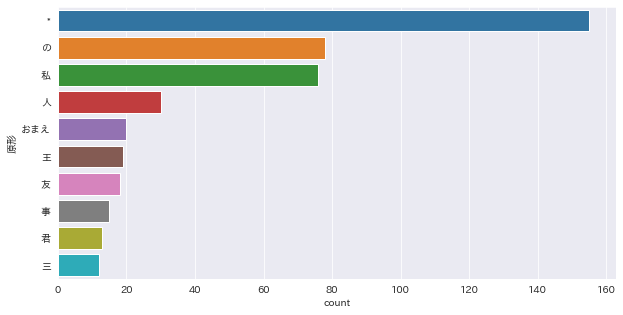

In [25]:
# 横向きの棒Graph で表示してみる
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

plt.figure(figsize=(10, 5))
sns.barplot(x=count['count'], y=count['原形'])

Graphから
- 外れ値はないか
- 上位や下位に邪魔な Data がないか
- 単語の特徴があらわれているのはどのあたりなのか

といった Data の理解へと繋がっていく。

## Word Cloud で可視化してみよう
Word Cloud から文章の特徴を見出す。

>Word Cloud
出現の頻度に合わせて大きさを変えた単語がまるで雲のように位置不定で配置されたもの。

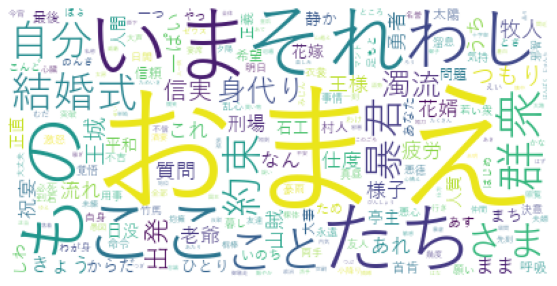

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import japanize_matplotlib

font_path = 'C:/Windows/Fonts/YuGothR.ttc'  # Font file の Path を格納
cloud = WordCloud(background_color='White', font_path=font_path, regexp="[\w'][\w']+").generate(
    ' '.join(noun['原形'].values))  # 単語を渡す際に原形の値を半角Space 区切りで連結して渡す。
plt.figure(figsize=(10, 5))  # 表示 Size の設定
plt.imshow(cloud)  # 画像File を読み込む
plt.axis('off')  # 軸は不要なので非表示に
plt.savefig('data/wc_noun_base_2.png')  # 画像File を出力
plt.show()  # 描画

とりあえず、１文字の単語は意味がわからないものが多いため、２文字以上の単語を表示。
次に１文字の単語も表示してみる。

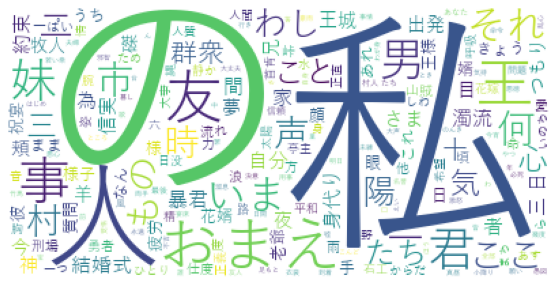

In [37]:
cloud = WordCloud(background_color='White', font_path=font_path).generate(' '.join(noun['原形'].values))  # Word Cloud を作成
plt.figure(figsize=(10, 5))  # 表示Size を設定
plt.imshow(cloud)  # 画像の読み込み
plt.axis('off')  # 軸を非表示
plt.savefig('data/wc_noun_base_1.png')  # 画像Data を非表示
plt.show()  # 描画

１文字でも重要な単語はあるようだが
- 私
- の
- 事

など無くてよいいものも目立つようになった。
個人の所感差はあるかもしれないが、今回は２文字以上の成約があった方が、単語の特徴が良く出ていると判断する。

参考に
- 名詞
- 表層形

を表示する。

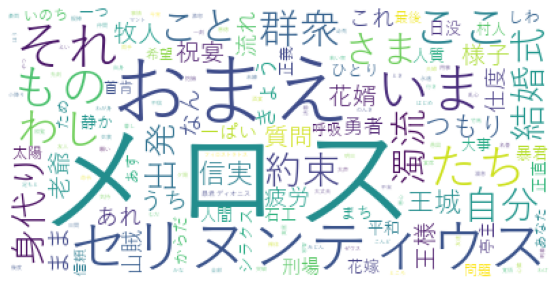

In [38]:
cloud = WordCloud(background_color='White', font_path=font_path, regexp="[\w'][\w']+").generate(
    ' '.join(noun['表層形'].values))  # ２文字以上で表層形の Word Cloud を作成
plt.figure(figsize=(10, 5))  # 表示Size を設定
plt.imshow(cloud)  # 画像を読み込み
plt.axis('off')  # 軸を非表示
plt.savefig('data/wc_noun_surface.png')  # 画像Data を出力
plt.show()  # 描画

- 原形が無くて "*" となっていた登場人物の名前が出てきている。
- 意味のわからないひらがな２文字が少し小さくなったことで、他の単語にも目が行くようになった。

個人の所感ではあるが、今回は表層形を使用したものが最適と感じる。

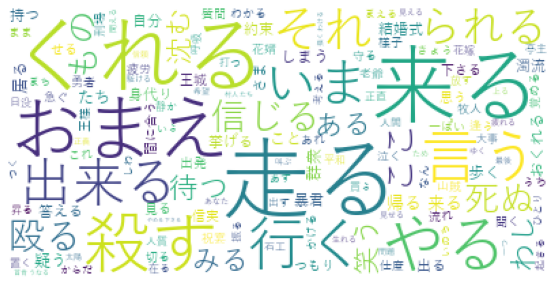

In [40]:
cloud = WordCloud(background_color='White', font_path=font_path, regexp="[\w'][\w']+").generate(
    ' '.join(verb['原形']))  # 名詞+動詞の原形、２文字以上の Word Clound を作成
plt.figure(figsize=(10, 5))  # 表示Size を設定
plt.imshow(cloud)  # 画像を読み込み
plt.axis('off')  # 軸を非表示
plt.savefig('data/wc_noun_verb_base.png')  # 画像Data を出力
plt.show()  # 描画

動詞が加わると、印象が大きく変わった。名詞だけのときよりも、物騒な話の印象が強まったと感じられる。

Word Cloud を利用すると
- 使用頻度の高い単語を抽出
- それとわかるように表示

してくれるので、中身を全て読まなくても特徴を捉えやすくなる。

**実用例**
アンケートや Review の Comment を集めて評価の傾向を読み取る。

**大事なこと**
作られた画像から文章を解釈し、説明できるか、ということ。

**注意点**
- 大きすぎる文字に引きずられすぎないこと。
- 不要な単語は可能な範囲で除外しておくこと。
etc...

**運用方法**
仕組みさえ作成すれば、すぐに何Pattern も作れるので１つに固執するのではなく、Quick に何Pattern も用意して分析
上で有効にする

## n-gram を作ってみよう

### n-gram
特徴Engineering の１つ。
文字列や文章を連続する n個の集まりで分割する手法。
- １個の場合: uni-gram
- ２個の場合: bi-gram
- ３個の場合: tri-gram

と呼ぶ。

> 特徴Engineering
> 機械学習Algorithm の性能が高くなるような特徴を生Data から作成し、予測能力を向上させる Process を指す。
> 様々な特徴が作られる中で、これだけで全てがわかるというものはない。
> しかし機械学習で必要とされる特徴がどのようなものか知ることで、
> - 様々な加工
> - 技術の幅を広げる必要性
>
> がわかる。

MeCab 後の単語Data から使用する単語を取り出してList にする。

In [41]:
target = mecab_df['表層形'].to_list()
len(target)

6712

全ての単語を対象に表層形を List化し、単語数を確認。

List化した単語を bi-gram にしていく。

In [47]:
from nltk import ngrams
bigram = ngrams(target, 2)  # 対象List と n にあたる数字をわたすことで bi-gram を作成

In [48]:
import collections
counter = collections.Counter(bigram)  # collections.Counter()を使用して、値の出現回数を Count
print(counter)

Counter({('た', '。'): 142, ('は', '、'): 129, ('だ', '。'): 72, ('。', '」'): 55, ('メロス', 'は'): 47, ('の', 'だ'): 45, ('て', '、'): 39, ('私', 'は'): 36, ('。', '私'): 34, ('。', 'メロス'): 33, ('て', 'いる'): 33, ('。', '「'): 31, ('し', 'た'): 25, ('し', 'て'): 25, ('」', '「'): 24, ('に', 'は'): 22, ('た', 'の'): 22, ('ぬ', '。'): 21, ('が', '、'): 21, ('も', '、'): 20, ('を', '、'): 18, ('に', '、'): 18, ('、', 'メロス'): 18, ('て', 'くれ'): 18, ('、', '私'): 17, ('て', '来'): 16, ('私', 'を'): 16, ('無い', '。'): 15, ('で', '、'): 15, ('ああ', '、'): 15, ('ある', '。'): 14, ('来', 'た'): 14, ('い', 'た'): 14, ('なら', 'ぬ'): 13, ('で', 'ある'): 13, ('て', 'い'): 13, ('れ', 'た'): 13, ('ない', '。'): 13, ('》', 'の'): 12, ('の', 'は'): 12, ('、', 'と'): 12, ('ます', '。'): 12, ('う', '。'): 12, ('あっ', 'た'): 11, ('に', 'なっ'): 11, ('いる', '。'): 11, ('で', 'は'): 11, ('か', '。'): 11, ('私', 'の'): 11, ('なっ', 'て'): 10, ('。', 'おまえ'): 10, ('で', 'あっ'): 9, ('の', '、'): 9, ('人', 'を'): 9, ('」', 'メロス'): 9, ('メロス', 'の'): 9, ('よう', 'に'): 9, ('帰っ', 'て'): 9, ('。', 'ああ'): 9, ('。', 'その'): 8, ('から', '

どのような単語の繋がりが多く使われているかがわかる。

> 例えば複数の文章から n-gram を作成して学習することで、どのような単語の組み合わせが多く使われる文章なのかがわかり、文章の分類Model に利用できる可能性がある。このように様々な特徴を作り出し、効果的に利用することで、機械学習Model の予測精度の向上に役立っている。

言語の処理はとても奥が深く、実際にやることになった場合は、機械学習を見据えた加工なども必要になってくる。
少し工夫すれば複数Data を取り扱うことも可能になり、複数Data を取り扱えるようになると、文章の分類や類似性の計算など、さらに面白い分析へと繋がり、利用Sean も各段に増えていく。